In [37]:
# Import all the fun stuff
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Grab the data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Let's see what they look like.
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Merge the 2 dataframes into 1. 
study_data_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Out of curiosity
len(study_data_df)

1893

In [6]:
# Nice

In [11]:
# Find the number of unique mouse IDs.
len(study_data_df["Mouse ID"].value_counts())

249

In [28]:
# Try removing duplicate timepoint rows for each mouse ID. Check on this mouse just to see what happened.
clean_data_df = study_data_df.drop_duplicates()
clean_data_df.loc[clean_data_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1
918,g989,Propriva,Female,21,26,25,56.045564,1


In [30]:
# Oh no! I have two different tumor volumes at one timepoint for this mouse ID! 
# What I'm going to do is just keep the first row for that timepoint.
# In real life, I think the way to go would be to chat with the person who collected the data and see what's up.
# There's no way this mouse had 2 different tumor volumes at the same point in time.
# Other options: remove all the duplicate rows, pretend that timepoint never happened. That may be what the instructions are saying, but it is unclear to me.
# Let's try this again.
clean_data_df = study_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_data_df.loc[clean_data_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [31]:
# Check the number of unique mouse IDs in the new clean dataframe.
len(clean_data_df["Mouse ID"].value_counts())
# This is unchanged as I would expect. I wasn't trying to remove any mouse IDs from the dataframe.

249

In [35]:
# Let's calculate summary statistics for each drug. 
# These'll have to be stored in a dataframe eventually, but I'll start with lists.
'''
What I need to calculate:
A column for each of the following statistics: 
    mean, 
    median, 
    variance, 
    standard deviation, 
    and SEM of the tumor volume.
'''
print() #It showed my comment as output without a print statement here, and I didn't like it.

In [49]:
# Why bother futzing with pandas value counts for the unique drug names when you can just use sets
indices=[]
rows=[]
cols=["Mean Tumor Volume","Median Tumor Volume","Variance","Standard Deviation","Std Error of Mean"]
for drug in set(clean_data_df['Drug Regimen']):
    indices.append(drug)
    mean = np.mean(clean_data_df.loc[clean_data_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"])
    median = np.median(clean_data_df.loc[clean_data_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"])
    var = np.var(clean_data_df.loc[clean_data_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"])
    std = np.std(clean_data_df.loc[clean_data_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"])
    sem = st.sem(clean_data_df.loc[clean_data_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"])
    rows.append([mean,median,var,std,sem])

In [50]:
# Make a new dataframe with some stats.
summ_stats=pd.DataFrame(rows,index=indices,columns=cols)
# :)
summ_stats

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Std Error of Mean
Propriva,52.393463,50.909965,42.862273,6.546928,0.525862
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346


<AxesSubplot:>

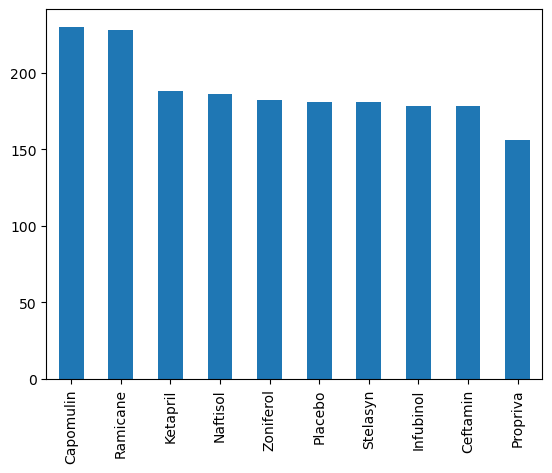

In [56]:
# Make a bar chart showing number of mice tested for each drug with pandas plots.
clean_data_df["Drug Regimen"].value_counts().plot.bar()

<BarContainer object of 10 artists>

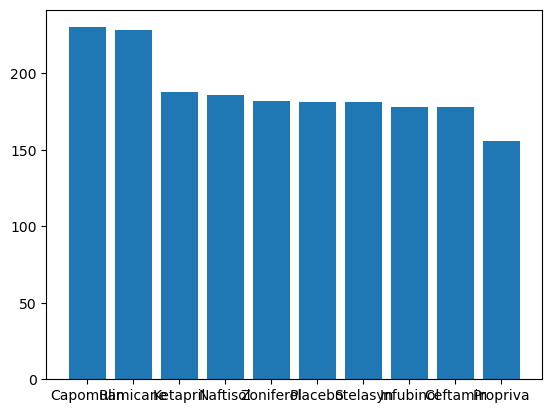

In [72]:
# Do the same thing again but with matplotlib this time.
drug_data=dict(clean_data_df["Drug Regimen"].value_counts())
drug_names=list(drug_data.keys())
counts=[drug_data[key] for key in drug_names]

plt.bar(drug_names,counts)
# Wow that is ugly

<AxesSubplot:ylabel='Sex'>

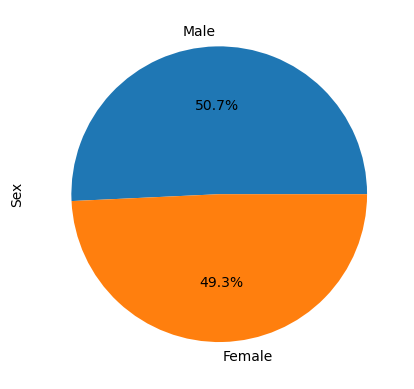

In [76]:
# Create a bar chart showing distribution of male vs female mice used in the study using pandas.
clean_data_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x247516dcd00>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

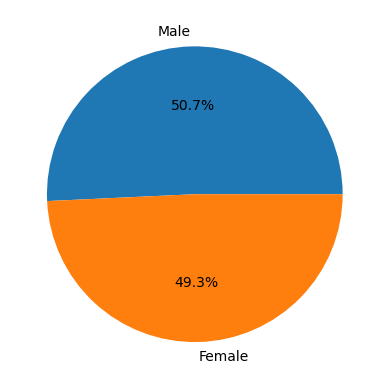

In [79]:
# Do the same thing again using matplotlib.
mouse_info=dict(clean_data_df["Sex"].value_counts())
labels=list(mouse_info.keys())
counts=[mouse_info[key] for key in labels]

plt.pie(counts,labels=labels,autopct="%1.1f%%")

In [89]:
# This time, I want the last timepoint for each mouse. I'll redo that thing I did earlier, where I picked the first of all duplicates, and this time I'll pick the last on the Timepoint column.


,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
40251,45,y769,Ceftamin,Female,6,27,68.594745,4
40252,45,y865,Ceftamin,Male,23,26,64.729837,3
40253,45,z581,Infubinol,Female,24,25,62.754451,3
40254,45,z795,Naftisol,Female,13,29,65.741070,3


In [121]:
final_timepoints = clean_data_df.sort_values("Timepoint").drop_duplicates(subset=['Mouse ID'],keep='last')
final_timepoints.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1599,v199,Naftisol,Female,17,29,0,45.000000,0
1,938,h428,Ketapril,Female,1,27,0,45.000000,0
2,1216,n482,Propriva,Female,4,29,0,45.000000,0
3,1163,l872,Placebo,Male,19,30,0,45.000000,0
4,1583,u153,Ceftamin,Female,11,25,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
244,577,a897,Placebo,Male,7,28,45,72.255963,4
245,567,a818,Naftisol,Female,12,28,45,74.997764,2
246,550,a699,Propriva,Female,5,28,45,62.191414,1
247,1693,w350,Propriva,Male,7,26,45,64.957562,2


In [122]:
# Mouse v199 only got checked at Timepoint 0? Check that.
clean_data_df.loc[clean_data_df["Mouse ID"]=="v199"]
# I guess so.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1599,v199,Naftisol,Female,17,29,0,45.0,0


In [99]:
# Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
# Fun news, we already have a list for treatment names that we used for the bar chart.
print(drug_names)
tumor_volumes=[]

['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva']


In [100]:
# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
# Append the resulting final tumor volumes for each drug to the empty list.
for drug in drug_names:
    tumor_volumes.append(list(final_timepoints.loc[final_timepoints["Drug Regimen"]==drug]["Tumor Volume (mm3)"]))


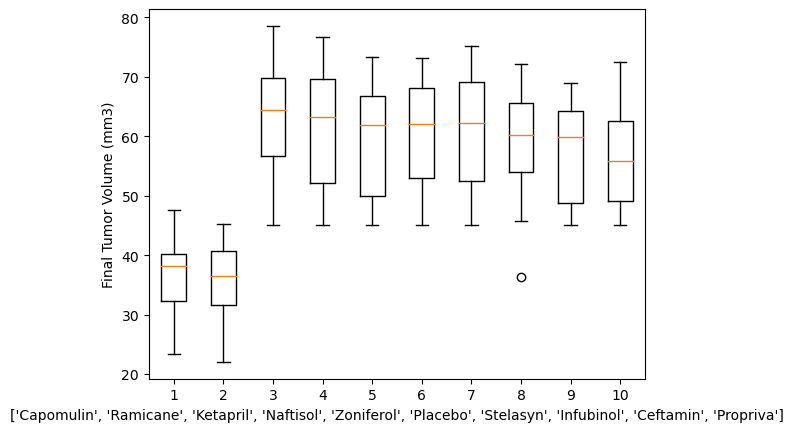

In [103]:
# Can you tell I don't like charts
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel(drug_names)
ax1.boxplot(tumor_volumes)
plt.show()

In [110]:
# Select a mouse that was treated with Capomulin 
capomulin_df=clean_data_df.loc[clean_data_df['Drug Regimen']=="Capomulin"]
capomulin_df
# I'll pick Mouse s185 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


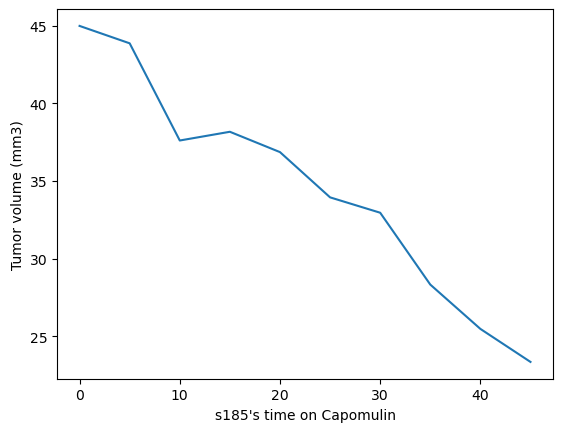

In [109]:
# Generate a line plot of tumor volume versus time point for that mouse. 
timepoints=capomulin_df.loc[capomulin_df["Mouse ID"]=="s185"]["Timepoint"]
volumes=capomulin_df.loc[capomulin_df["Mouse ID"]=="s185"]["Tumor Volume (mm3)"]
plt.plot(timepoints,volumes)
plt.xlabel("s185's time on Capomulin")
plt.ylabel("Tumor volume (mm3)")
plt.show()

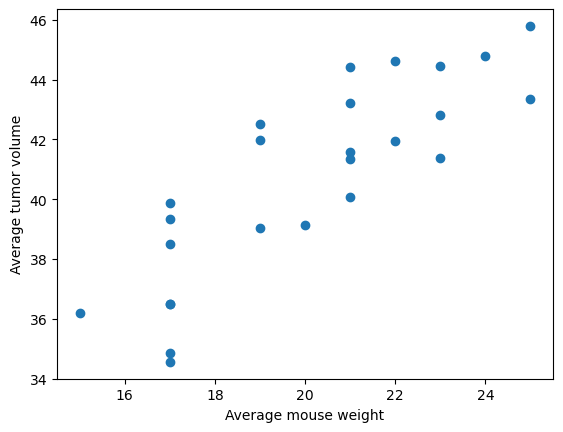

In [114]:
# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
mouse_weights=capomulin_df.groupby("Mouse ID").mean()["Weight (g)"]
volumes=capomulin_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
plt.scatter(mouse_weights,volumes,marker="o")
plt.xlabel("Average mouse weight")
plt.ylabel("Average tumor volume")
plt.show()

In [116]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, volumes)
regress_values = mouse_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

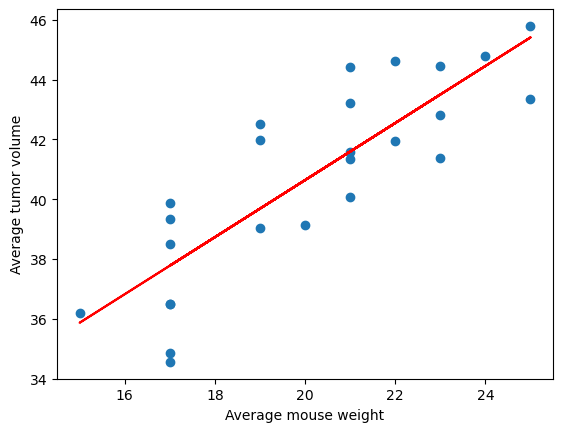

In [118]:
plt.scatter(mouse_weights,volumes,marker="o")
plt.xlabel("Average mouse weight")
plt.ylabel("Average tumor volume")
plt.plot(mouse_weights,regress_values,"red")
plt.show()

In [120]:
line_eq

'y = 0.95x + 21.55'

In [ ]:
# Looks like almost a perfect positive correlation. Fatter mice get fatter tumors, at least the ones that get Capomulin. (Not causation, I know.)